<a href="https://colab.research.google.com/github/yonaan/PPG-BP/blob/preprocess/p040033.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040033.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5        6  \
0  1.529814  1.515152  1.497556  1.478006  1.461388  1.449658  1.44868   

          7         8         9  ...      4192      4193      4194      4195  \
0  1.460411  1.488759  1.535679  ...  2.530792  2.532747  2.519062  2.495601   

       4196     4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  2.462366  2.42522  2.384164  2.332356    111.797776      62.465094  

[1 rows x 4202 columns]
[111.7977761]  /  [62.46509396]
          0         1         2         3         4         5        6  \
0  1.529814  1.515152  1.497556  1.478006  1.461388  1.449658  1.44868   

          7         8         9  ...      4190      4191      4192      4193  \
0  1.460411  1.488759  1.535679  ...  2.471163  2.511241  2.530792  2.532747   

       4194      4195      4196     4197      4198      4199  
0  2.519062  2.495601  2.462366  2.42522  2.384164  2.332356  

[1 rows x 4200 columns]


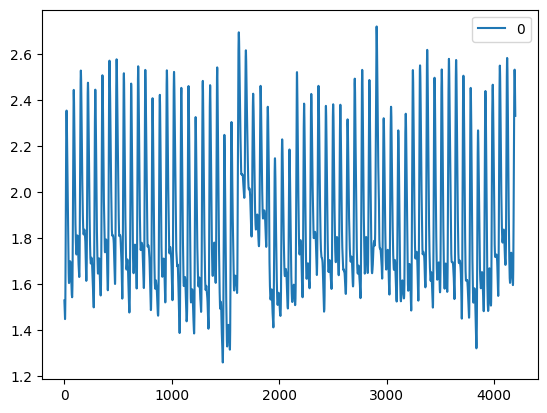

In [58]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [59]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

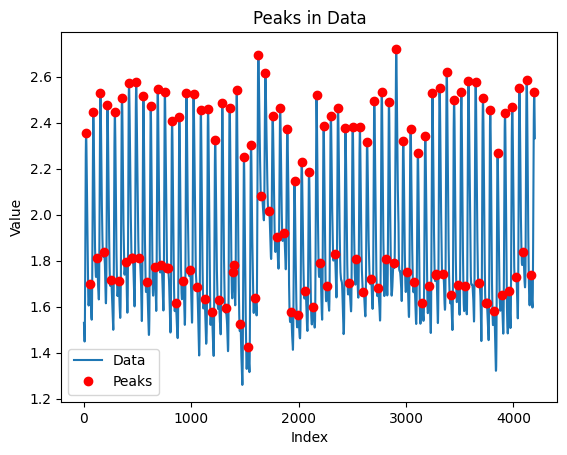

{'indices': array([  20,   54,   87,  121,  153,  185,  219,  253,  288,  323,  354,
        389,  420,  448,  451,  486,  517,  554,  586,  622,  657,  687,
        720,  753,  778,  782,  821,  853,  889,  924,  954,  986, 1021,
       1053, 1089, 1123, 1156, 1190, 1222, 1256, 1289, 1321, 1357, 1392,
       1396, 1423, 1457, 1490, 1527, 1556, 1589, 1624, 1650, 1690, 1723,
       1758, 1796, 1827, 1860, 1894, 1930, 1961, 1995, 2028, 2061, 2096,
       2136, 2166, 2199, 2232, 2268, 2299, 2334, 2366, 2435, 2470, 2503,
       2538, 2570, 2602, 2637, 2672, 2704, 2739, 2773, 2810, 2840, 2884,
       2908, 2973, 3011, 3042, 3077, 3109, 3147, 3179, 3214, 3245, 3275,
       3280, 3312, 3342, 3379, 3417, 3447, 3485, 3514, 3551, 3581, 3648,
       3682, 3716, 3744, 3750, 3784, 3818, 3852, 3889, 3921, 3958, 3989,
       4022, 4055, 4091, 4123, 4161, 4193]), 'values': array([2.35483871, 1.69990225, 2.44477028, 1.81231672, 2.52883675,
       1.83773216, 2.47605083, 1.71554252, 2.4457478 , 1.712609

In [60]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [66]:
def split_values_high_low(filtered_df, threshold=2.14):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[2.3548387096774195, None, 2.444770283479961, None, 2.5288367546432062, None, 2.4760508308895406, None, 2.4457478005865103, None, 2.5083088954056696, None, 2.5718475073313782, None, None, 2.5777126099706744, None, 2.517106549364614, None, 2.472140762463343, None, 2.547409579667644, None, 2.5317693059628543, None, None, 2.4086021505376345, None, 2.423264907135875, None, 2.529814271749756, None, 2.52297165200391, None, 2.453567937438905, None, 2.4613880742913, None, 2.326490713587488, None, 2.4838709677419355, None, 2.4652981427174976, None, None, 2.5425219941348973, None, 2.249266862170088, None, 2.304985337243402, None, 2.695014662756598, None, 2.616813294232649, None, 2.4281524926686218, None, 2.462365591397849, None, 2.3714565004887587, None, 2.147605083088954, None, 2.2297165200391005, None, 2.185728250244379, None, 2.5219941348973607, None, 2.3851417399804498, None, 2.4271749755620724, None, 2.462365591397849, 2.375366568914956, None, 2.3822091886608017, None, 2.380254154447703, No

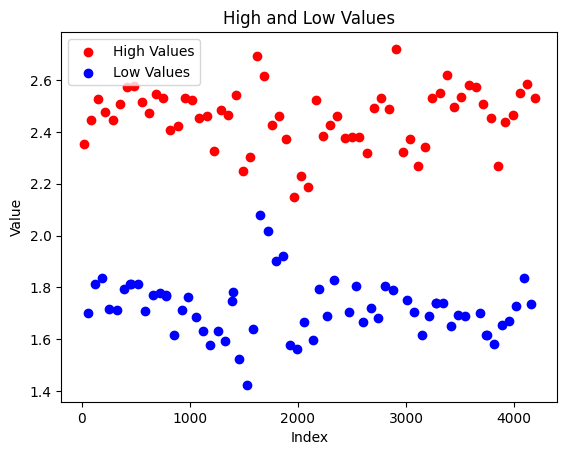

In [67]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [69]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 2.456547037192199
Average Low Value: 1.7203690127077222


In [70]:
# Scale down to 0-1
def scale_down(a, min_val_orig=1.4, max_val_orig=2.8, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [71]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 2.456547037192199 : 0.7546764551372852
Scaled value of 1.7203690127077222 : 0.22883500907694454
